In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [38]:
#Some configs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200

In [29]:
#load data sheet
df = pd.read_csv ('./data/Income.csv')
df.head()

,Income,Expenditure
0,8,6
1,9,7
2,10,9
3,11,9
4,12,10


In [30]:
income = df['Income']
expenditure = df['Expenditure']
income_, expenditure_ = np.array(income), np.array(expenditure)
income_ = sm.add_constant(income_)

In [31]:
#Create model
model = sm.OLS(expenditure_,income_)
res = model.fit()

In [32]:
#Get results
R_sqr = res.rsquared
params = res.params
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     747.5
Date:                Sun, 01 Aug 2021   Prob (F-statistic):           7.13e-13
Time:                        07:38:29   Log-Likelihood:                -11.998
No. Observations:                  15   AIC:                             28.00
Df Residuals:                      13   BIC:                             29.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6207      0.470      1.321      0.2

C:\Users\trunl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


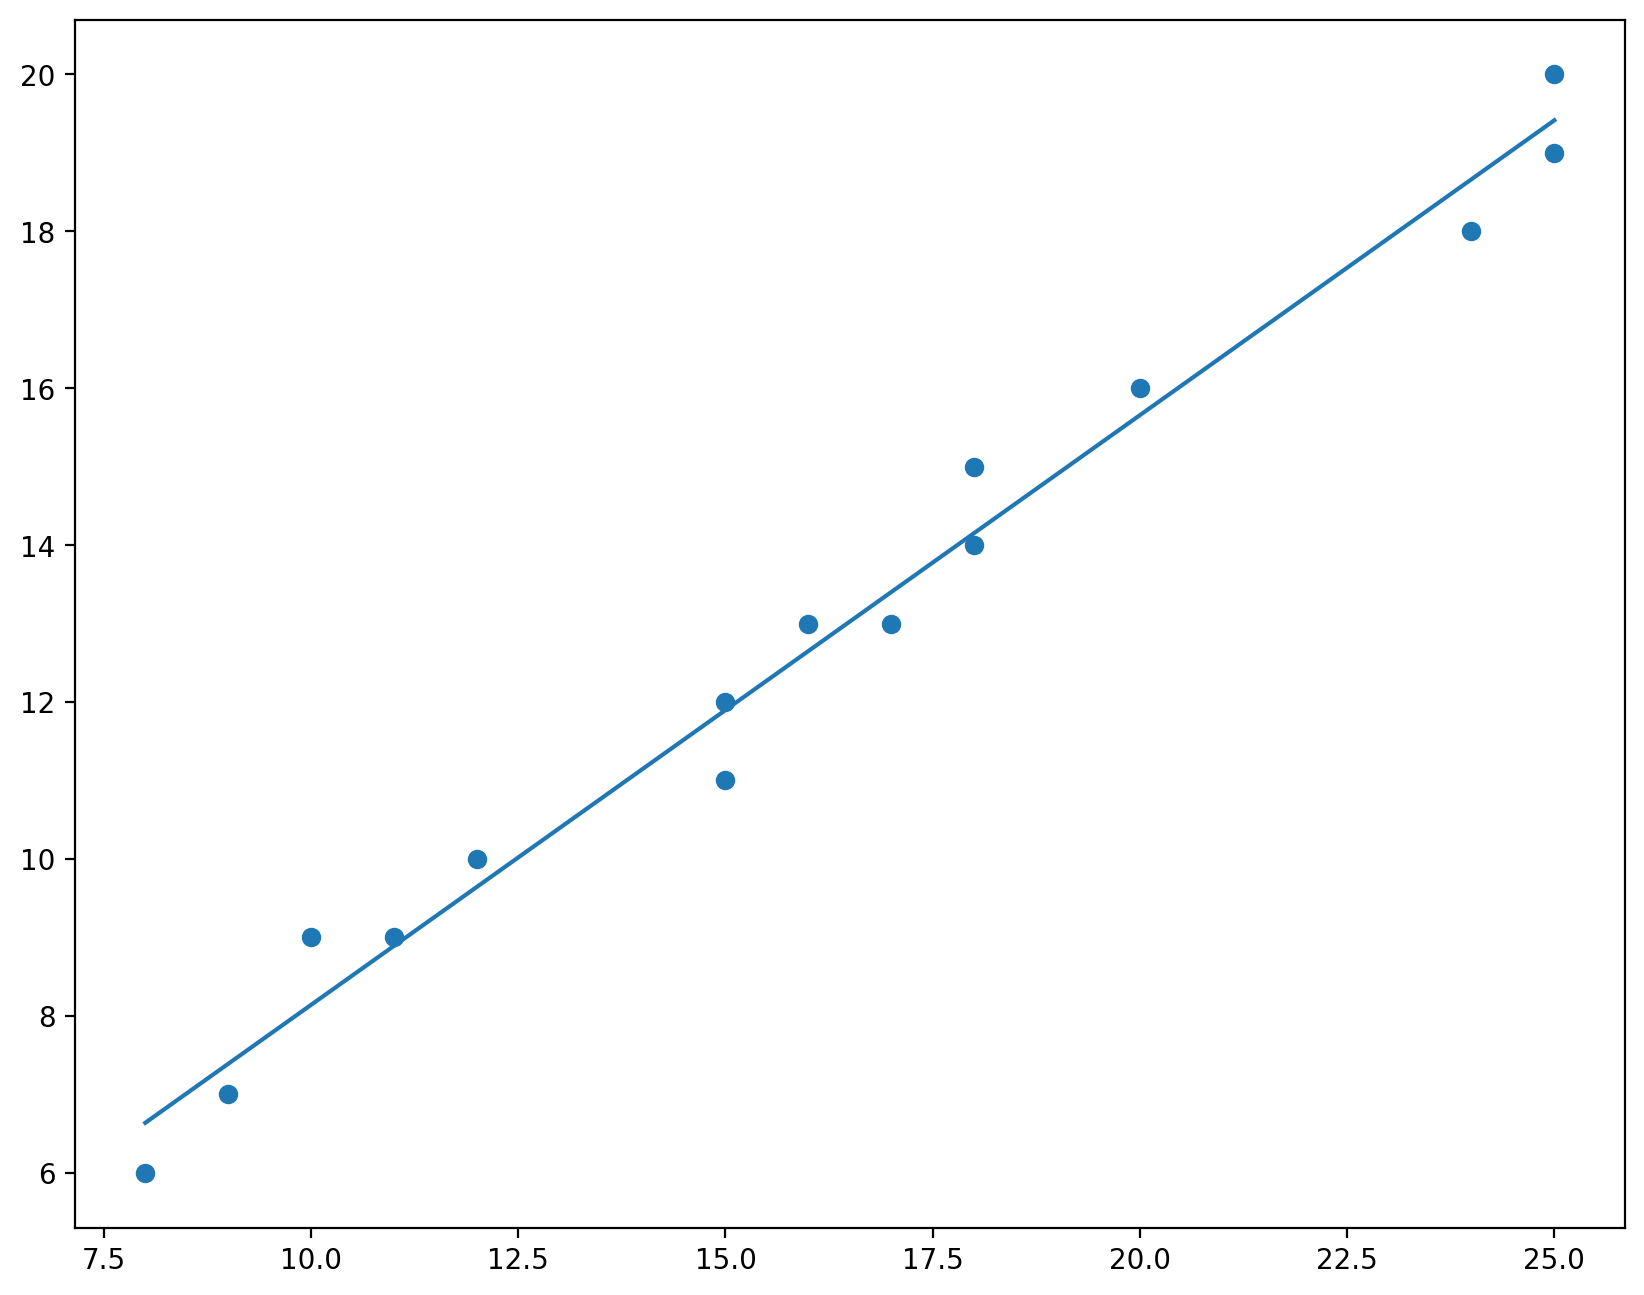

In [39]:
#Visualization
plt.scatter(income, expenditure)
plt.plot(income, params[0]+params[1]*income)

In [34]:
pre_values = res.predict(income_)

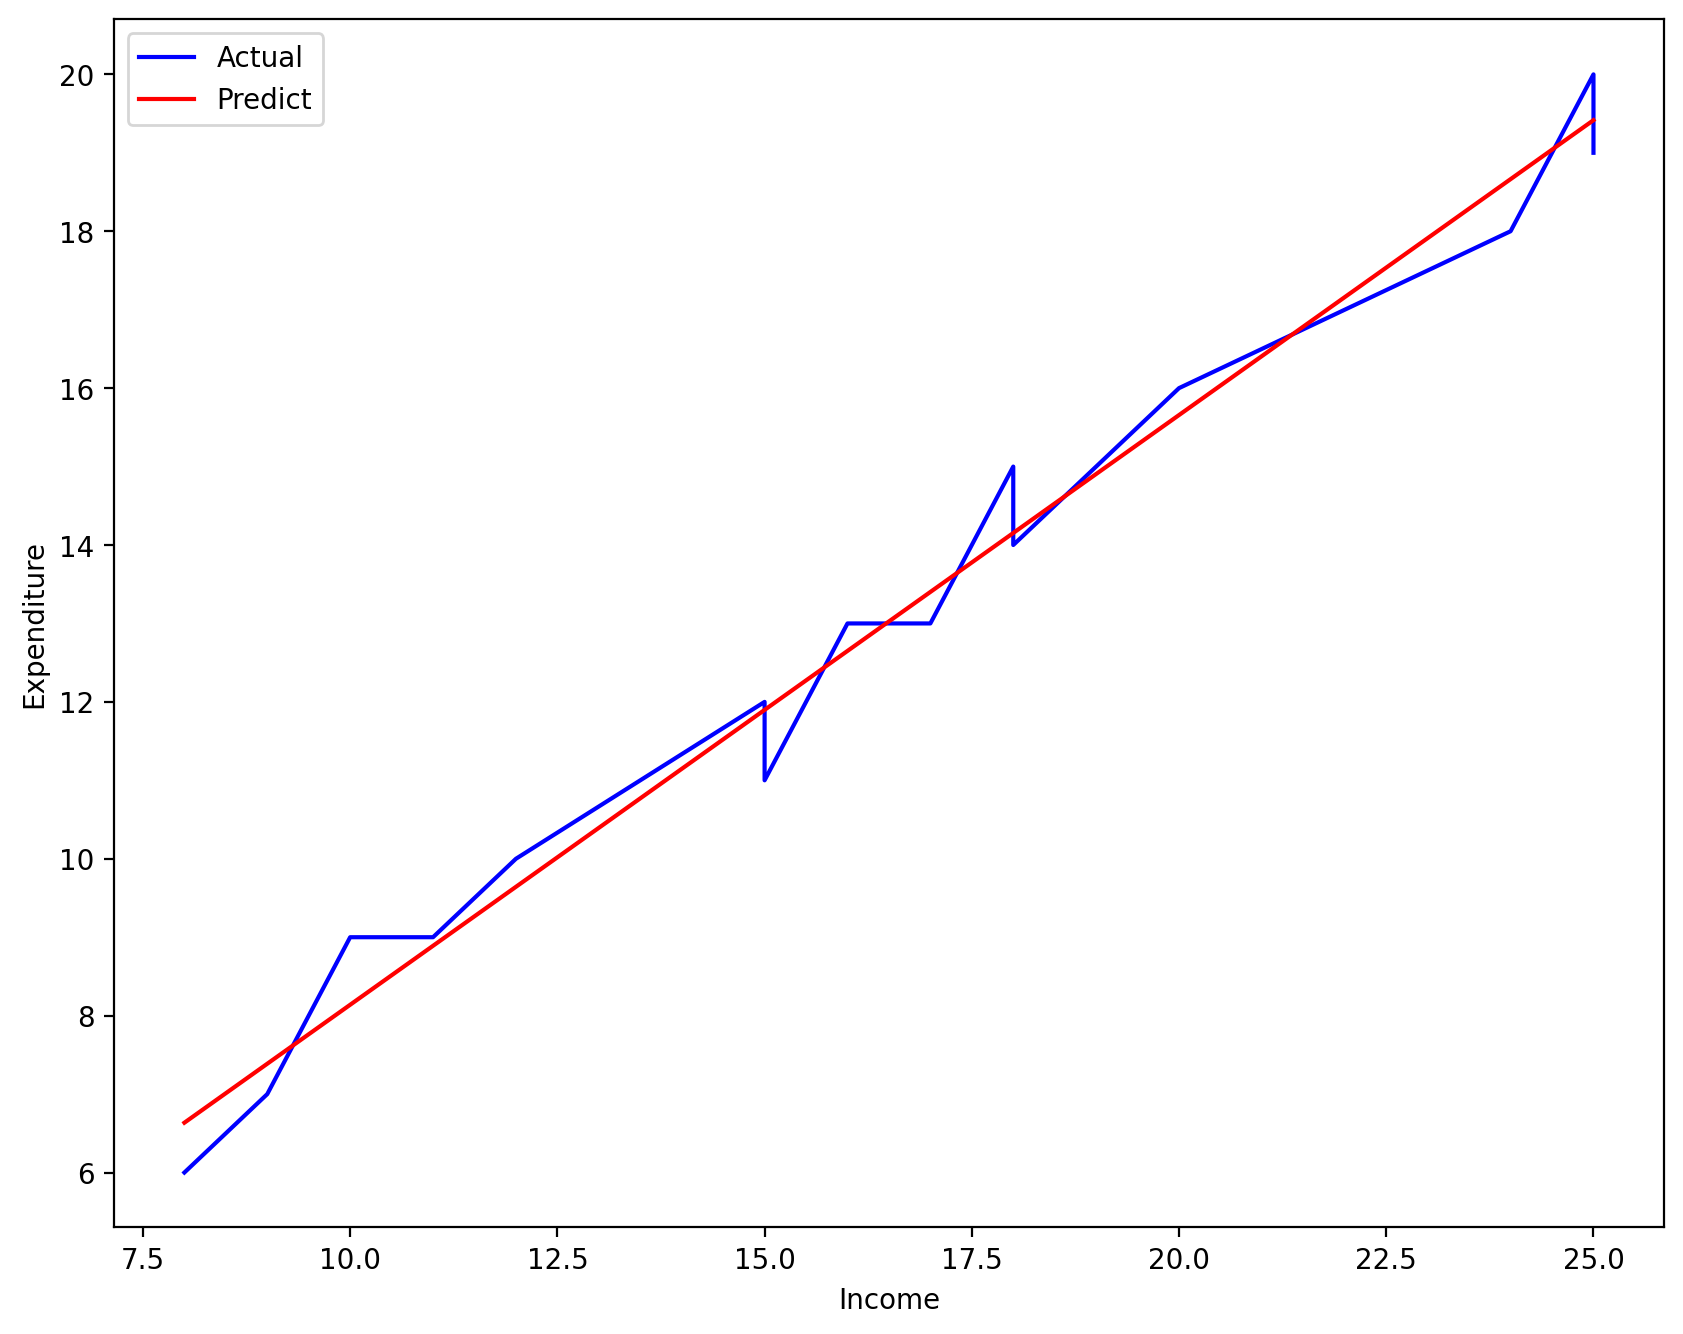

In [40]:
plt.plot(income,expenditure, color = 'b', label = 'Actual')
plt.plot(income, pre_values, color = 'r', label = 'Predict')
plt.xlabel('Income')
plt.ylabel('Expenditure')
plt.legend()

In [44]:
#predict new value
new_income = np.array ([23,26,30])
new_income = sm.add_constant(new_income)
print(new_income)
pre_values_2 = res.predict(new_income)
print (pre_values_2)

[[ 1. 23.]
 [ 1. 26.]
 [ 1. 30.]]
[17.91229656 20.16772152 23.17495479]
